In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
drivers = pd.read_csv('data/drivers.csv')
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [7]:
constructors = pd.read_csv('data/constructors.csv')
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [8]:
races = pd.read_csv('data/races.csv')
races.drop('url', axis = 1)
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [9]:
qualifying = pd.read_csv('data/qualifying.csv')
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [10]:
lap_times = pd.read_csv('data/lap_times.csv')
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [11]:
pit_stops = pd.read_csv('data/pit_stops.csv')
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


## Constructors in Qualifying:
- No. of Poles
- No. of Front Rows

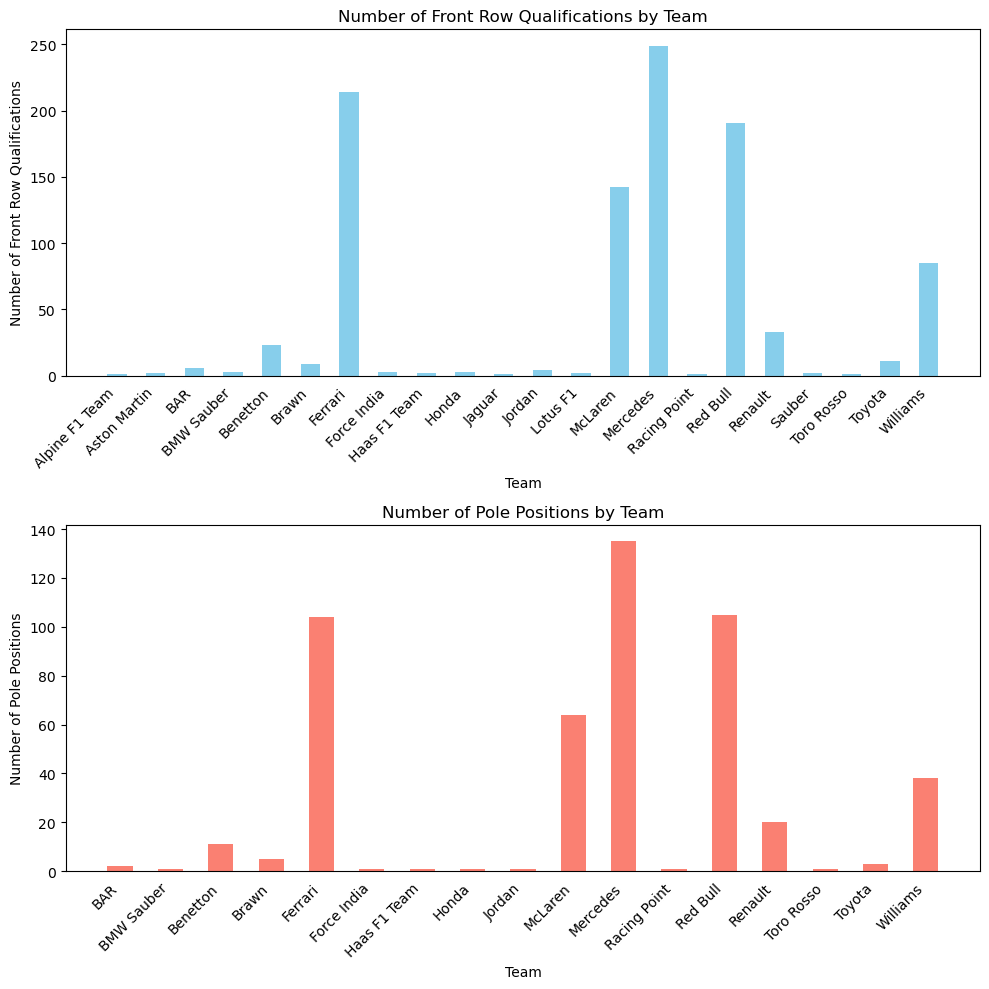

In [12]:
merged_df = qualifying.merge(constructors, on='constructorId', how='left')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

result_front_row = merged_df[(merged_df['position'] == 1) | (merged_df['position'] == 2)]['name'].value_counts().sort_index()

bar_width = 0.5
bar_positions = np.arange(len(result_front_row))
ax1.bar(bar_positions, result_front_row.values, color='skyblue', width=bar_width)
ax1.set_xlabel('Team')
ax1.set_ylabel('Number of Front Row Qualifications')
ax1.set_title('Number of Front Row Qualifications by Team')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(result_front_row.index, rotation=45, ha='right')
ax1.tick_params(axis='x', which='both', bottom=False, top=False)

result_pole = merged_df[(merged_df['position'] == 1)]['name'].value_counts().sort_index()

bar_positions = np.arange(len(result_pole))
ax2.bar(bar_positions, result_pole.values, color='salmon', width=bar_width)
ax2.set_xlabel('Team')
ax2.set_ylabel('Number of Pole Positions')
ax2.set_title('Number of Pole Positions by Team')
ax2.set_xticks(bar_positions)
ax2.set_xticklabels(result_pole.index, rotation=45, ha='right')
ax2.tick_params(axis='x', which='both', bottom=False, top=False)

plt.tight_layout()
plt.show()


## Most races won
- driver
- constructor

In [9]:
race_results = pd.read_csv('data/results.csv')
race_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


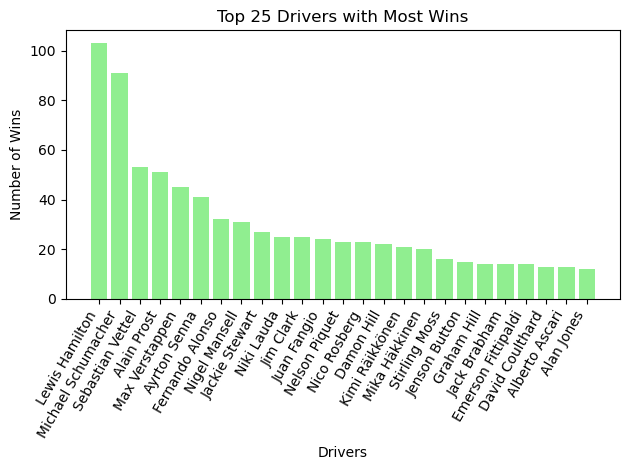

In [10]:
merged_result_driver = race_results.merge(drivers, on='driverId', how='left')

df = merged_result_driver[merged_result_driver['positionText'] == '1'][['forename', 'surname']]

df['fullname'] = df['forename'] + " " + df['surname']

df_val = df['fullname'].value_counts().head(25)

plt.bar(df_val.index, df_val.values,color = 'LightGreen')
plt.xticks(rotation=60,ha = 'right')
plt.xlabel('Drivers')
plt.ylabel('Number of Wins')
plt.title('Top 25 Drivers with Most Wins')
plt.tight_layout()
plt.show()


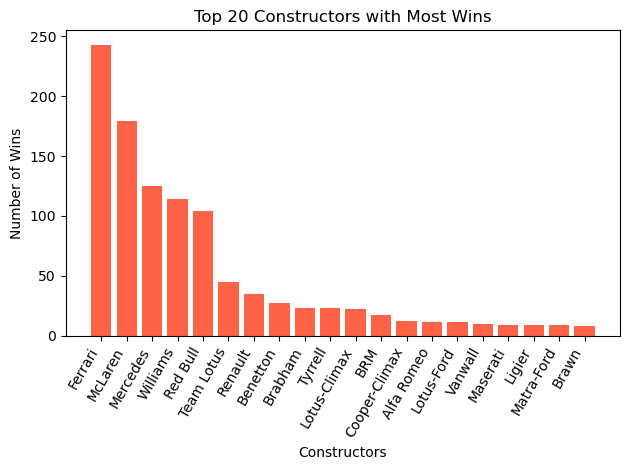

In [11]:
merged_result_contructor = race_results.merge(constructors, on='constructorId', how='left')

df = merged_result_contructor[merged_result_contructor['positionText'] == '1']

df_val = df['name'].value_counts().head(20)

plt.bar(df_val.index, df_val.values,color = 'tomato')
plt.xticks(rotation=60,ha = 'right')
plt.xlabel('Constructors')
plt.ylabel('Number of Wins')
plt.title('Top 20 Constructors with Most Wins')
plt.tight_layout()
plt.show()


## Fastest Laps on each circuit

In [12]:
circuits = pd.read_csv('data/circuits.csv')
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


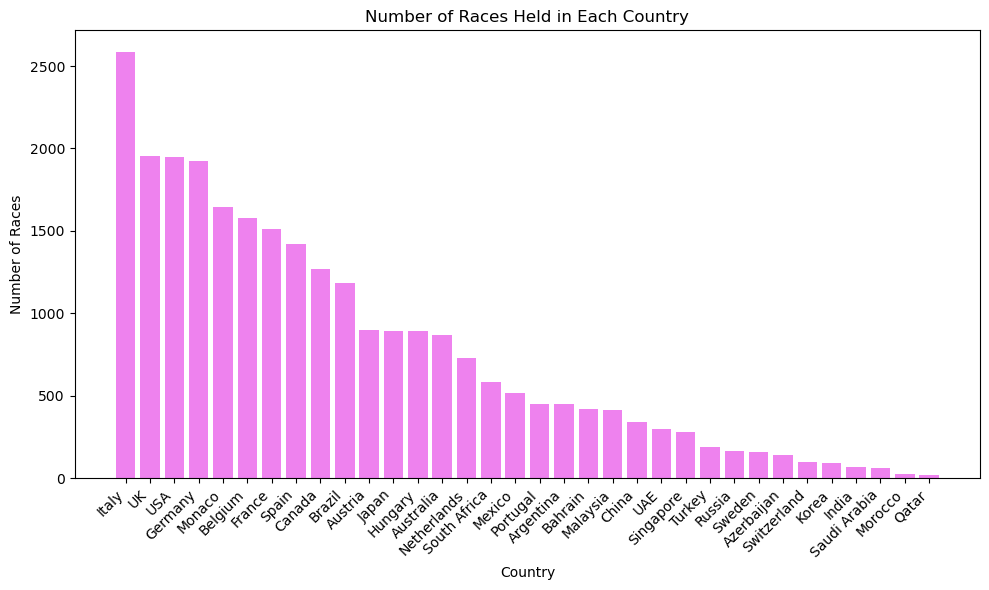

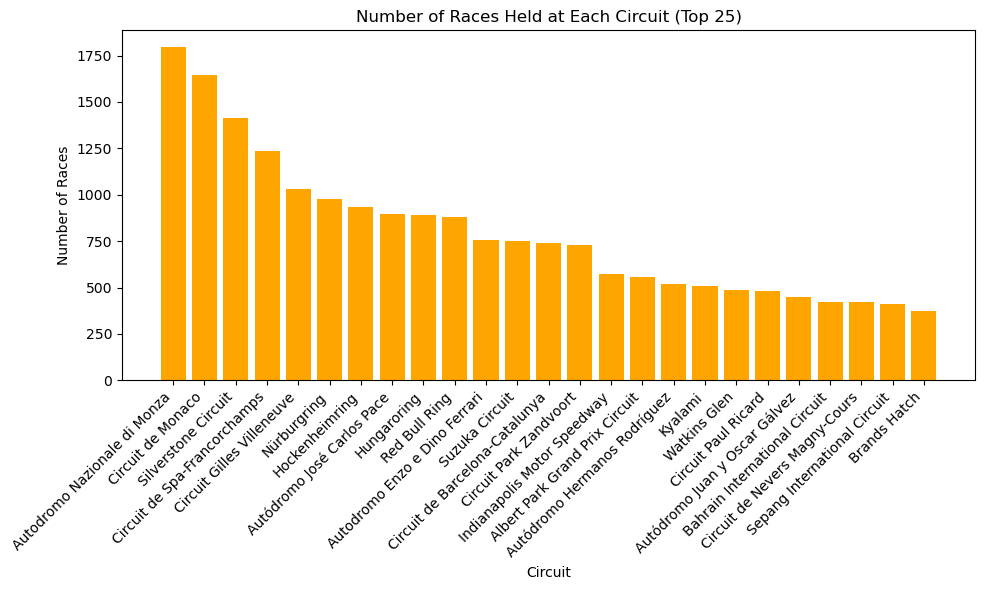

In [13]:
merged_results = race_results.merge(races.merge(circuits, how='left', on='circuitId'), how='left', on='raceId')

country_with_most_races = merged_results['country'].value_counts().sort_values(ascending=False)
circuit_with_most_races = merged_results['name_y'].value_counts().sort_values(ascending=False).head(25)

plt.figure(figsize=(10, 6))
plt.bar(country_with_most_races.index, country_with_most_races.values, color='violet')
plt.xlabel('Country')
plt.ylabel('Number of Races')
plt.title('Number of Races Held in Each Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(circuit_with_most_races.index, circuit_with_most_races.values, color='orange')
plt.xlabel('Circuit')
plt.ylabel('Number of Races')
plt.title('Number of Races Held at Each Circuit (Top 25)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
# Correct the merge operation
merged_races_laptimes_circuits = circuits.merge(
    races.merge(lap_times, on="raceId", how="left"), how="left", on="circuitId"
)
merged_races_laptimes_circuits.columns

Index(['circuitId', 'circuitRef', 'name_x', 'location', 'country', 'lat',
       'lng', 'alt', 'url_x', 'raceId', 'year', 'round', 'name_y', 'date',
       'time_x', 'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'driverId', 'lap', 'position', 'time_y', 'milliseconds'],
      dtype='object')

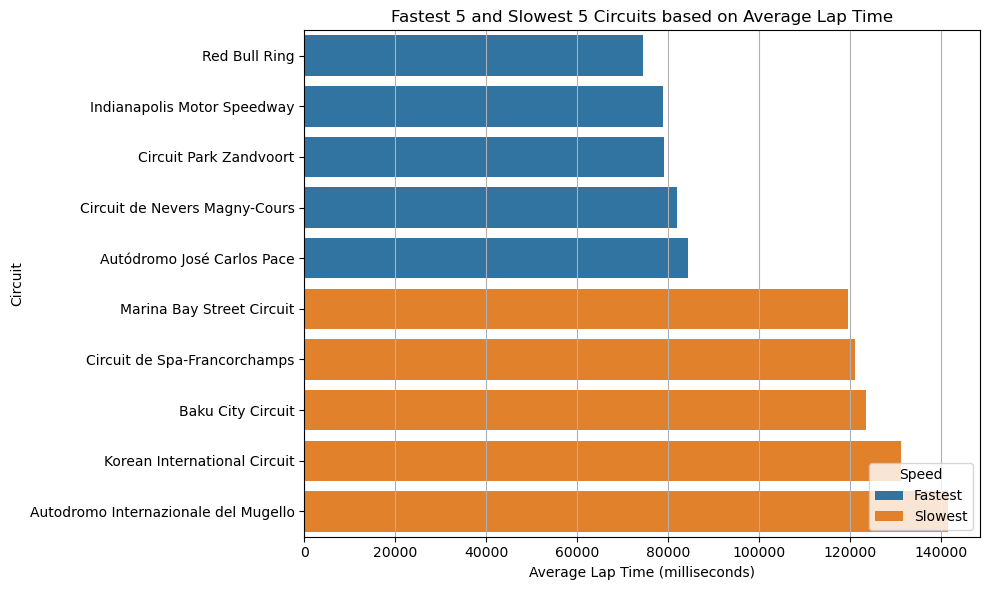

In [24]:
average_lap_times = (
    merged_races_laptimes_circuits.groupby("circuitId")["milliseconds"]
    .mean()
    .reset_index()
)

average_lap_times = average_lap_times.merge(
    circuits[["circuitId", "name"]], on="circuitId"
)

average_lap_times = average_lap_times.sort_values(by="milliseconds")

average_lap_times = average_lap_times.dropna()

fastest_5 = average_lap_times.head(5)
slowest_5 = average_lap_times.tail(5)

combined = pd.concat(
    [fastest_5.assign(speed="Fastest"), slowest_5.assign(speed="Slowest")]
)

plt.figure(figsize=(10, 6))

sns.barplot(x="milliseconds", y="name", data=combined, hue="speed", dodge=False)

plt.xlabel("Average Lap Time (milliseconds)")
plt.ylabel("Circuit")
plt.title("Fastest 5 and Slowest 5 Circuits based on Average Lap Time")
plt.legend(title="Speed", loc="lower right")
plt.grid(axis="x")

plt.tight_layout()
plt.show()

In [16]:
# Assuming races is your DataFrame
races.drop("time", axis=1, inplace=True)

In [17]:
merged_pitstops_races = races.merge(pit_stops,on='raceId',how='left')
merged_pitstops_races.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driverId',
       'stop', 'lap', 'time', 'duration', 'milliseconds'],
      dtype='object')

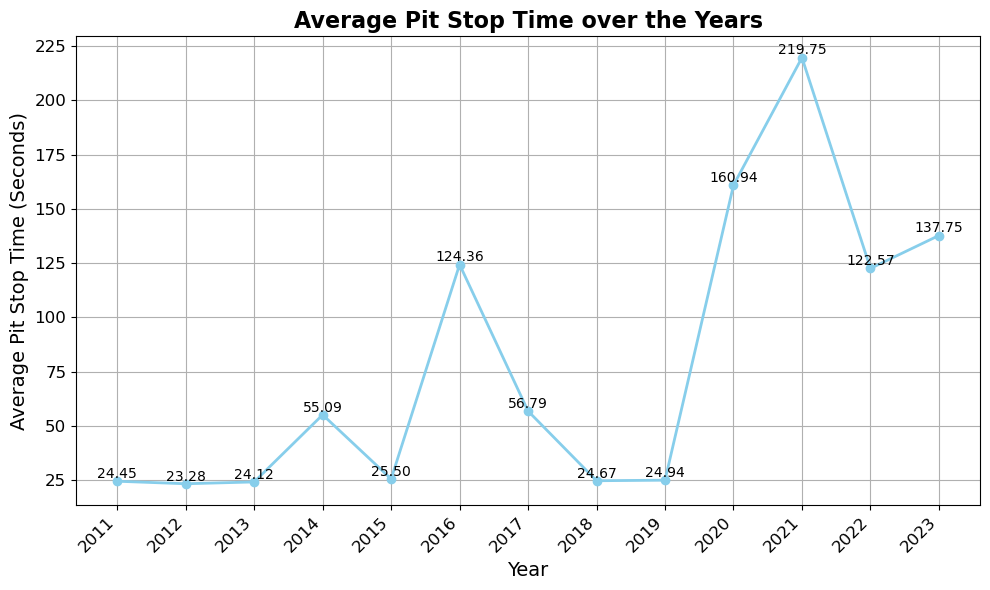

In [18]:
import matplotlib.pyplot as plt

# Calculate the average pit stop time for each year
avg_time_per_year = (
    merged_pitstops_races.groupby("year")["milliseconds"].mean().dropna()
)

# Convert milliseconds to seconds for readability
avg_time_per_year_seconds = avg_time_per_year / 1000

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(
    avg_time_per_year_seconds.index,
    avg_time_per_year_seconds.values,
    marker="o",
    color="skyblue",
    linewidth=2,
)

# Adding title and labels
plt.title("Average Pit Stop Time over the Years", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Pit Stop Time (Seconds)", fontsize=14)
plt.xticks(avg_time_per_year_seconds.index, rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Adding data labels on data points
for i, v in enumerate(avg_time_per_year_seconds.values):
    plt.text(
        avg_time_per_year_seconds.index[i],
        v + 0.1,
        f"{v:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Single race Lap times

In [19]:
race_842 = lap_times[lap_times['raceId'] == 842]

In [20]:
import plotly.graph_objects as go
import pandas as pd

# Sample data structure
# Assuming race_842 is a DataFrame with columns ['driverId', 'lap', 'milliseconds']
# Assuming drivers is a DataFrame with columns ['driverId', 'name']

# Group lap times by driver and lap number
grouped = race_842.groupby(["driverId", "lap"])["milliseconds"].sum().reset_index()

# Create an interactive plot
fig = go.Figure()

# Add traces for each driver
for driver_id, data in grouped.groupby("driverId"):
    fig.add_trace(
        go.Scatter(
            x=data["lap"],
            y=data["milliseconds"],
            mode="lines+markers",
            name=f"Driver {driver_id}",
        )
    )

# Update legend names
for trace in fig.data:
    driver_id = int(trace.name.split()[1])
    driver_name = drivers[drivers["driverId"] == driver_id]["code"].values[0]
    trace.name = f"{driver_name} ({driver_id})"

# Update layout
fig.update_layout(
    title="Lap Times by Driver and Lap Number",
    xaxis_title="Lap Number",
    yaxis_title="Lap Time (milliseconds)",
    legend_title="Driver",
    template="plotly_white",
)

# Show the plot
fig.show()

In [21]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Sample data structure
# Assuming race_842 is a DataFrame with columns ['driverId', 'lap', 'position']
# Assuming drivers is a DataFrame with columns ['driverId', 'code']

# Group data by driver and lap
grouped = race_842.groupby(["driverId", "lap"])["position"].sum().reset_index()

# Create an interactive plot
fig = go.Figure()

# Get a color palette with 20 colors
colors = px.colors.qualitative.Alphabet

# Add traces for each driver
for i, (driver_id, data) in enumerate(grouped.groupby("driverId")):
    fig.add_trace(
        go.Scatter(
            x=data["lap"],
            y=data["position"],
            mode="lines+markers",
            name=f"Driver {driver_id}",
            line=dict(color=colors[i % len(colors)]),  # Cycle through colors
            marker=dict(color=colors[i % len(colors)]),
        )
    )

# Update legend names
for trace in fig.data:
    driver_id = int(trace.name.split()[1])
    driver_name = drivers[drivers["driverId"] == driver_id]["driverRef"].values[0]
    trace.name = f"{driver_name} ({driver_id})"

# Update layout
fig.update_layout(
    title="Driver Positions by Lap",
    xaxis_title="Lap Number",
    yaxis_title="Position",
    yaxis=dict(
        autorange="reversed"
    ),  # Reverse the y-axis to show 1st position at the top
    legend_title="Driver",
    template="plotly_white",
    height=600,
    width=1000,
)

# Show the plot
fig.show()

In [22]:
# Group lap times by driver, lap, and raceId
grouped = (
    lap_times.groupby(["driverId", "lap", "raceId"])["position"].sum().reset_index()
)

# Filter to only include lap times for raceId 842
grouped = grouped[grouped["raceId"] == 842]

# Calculate the number of overtakes and shifts in position for each driver
grouped["overtakes"] = grouped.groupby("driverId")["position"].diff().fillna(0).cumsum()
grouped["shifts_in_position"] = (
    grouped.groupby("driverId")["position"].diff().fillna(0).abs().cumsum()
)

# Print the results
print(grouped[["driverId", "overtakes", "shifts_in_position"]])

        driverId  overtakes  shifts_in_position
70             1        0.0                 0.0
387            1        0.0                 0.0
703            1        0.0                 0.0
1018           1        0.0                 0.0
1333           1        0.0                 0.0
...          ...        ...                 ...
406030       816      -25.0               535.0
406048       816      -25.0               535.0
406066       816      -25.0               535.0
406084       816      -25.0               535.0
406102       816      -25.0               535.0

[1128 rows x 3 columns]


['circuits.csv',
 'constructors.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'drivers.csv',
 'driver_standings.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'sprint_results.csv',
 'status.csv']